# Response of Cayenne Pepper to Different Water Regimes in Abeokuta
## Yield Characteristics Analysis

by Udechukwu Jerry Chinedu

Water regime plays an essential role in determining Cayenne pepper yield characteristics. Water stress and overwatering should be avoided to prevent reduced yield and/or yeild quality. Yield charactetristics observed in this study include: Fruit diameter, Fruit lenght, Fruit weight and Number of fruits per treatment.

Keys:
* FD- fruit diameter
* FL- fruit lenght
* FW- fruit weight
* NF- number of fruits
* TRT- treatments
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days
* WAT- weeks after transplant

In [1]:
# import required libaries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("yeild_characteristics.csv")
df.head()

,TRT,Replica,FL1H,FD1H,FW1H,NF1H,FL2H,FD2H,FW2H,NF2H,FL3H,FD3H,FW3H,NF3H
0,FLD,1,0.0,0.0,0.0,0,7.5,0.8,1.90,51,6.6,0.5,1.55,23
1,2DW,1,0.0,0.0,0.0,0,6.7,1.2,3.80,4,4.7,0.6,1.93,6
2,4DW,1,0.0,0.0,0.0,0,0.0,0.0,0.00,0,3.8,0.7,1.55,7
3,6DW,1,0.0,0.0,0.0,0,0.0,0.0,0.00,0,0.0,0.0,0.00,0
4,2DW,2,0.0,0.0,0.0,0,3.4,1.7,1.97,20,2.9,1.3,1.53,15


In [3]:
df.shape

(12, 14)

In [4]:
df.duplicated().sum()

0

In [5]:
# exclude unwanted column
df=df.drop("Replica", axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TRT     12 non-null     object 
 1   FL1H    12 non-null     float64
 2   FD1H    12 non-null     float64
 3   FW1H    12 non-null     float64
 4   NF1H    12 non-null     int64  
 5   FL2H    12 non-null     float64
 6   FD2H    12 non-null     float64
 7   FW2H    12 non-null     float64
 8   NF2H    12 non-null     int64  
 9   FL3H    12 non-null     float64
 10  FD3H    12 non-null     float64
 11  FW3H    12 non-null     float64
 12  NF3H    12 non-null     int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 1.3+ KB


In [7]:
df.isnull().sum()

TRT     0
FL1H    0
FD1H    0
FW1H    0
NF1H    0
FL2H    0
FD2H    0
FW2H    0
NF2H    0
FL3H    0
FD3H    0
FW3H    0
NF3H    0
dtype: int64

In [8]:
# Calculate the average of each treatment

avg_yield = df.groupby("TRT").mean().round(2)
avg_yield

,FL1H,FD1H,FW1H,NF1H,FL2H,FD2H,FW2H,NF2H,FL3H,FD3H,FW3H,NF3H
TRT,,,,,,,,,,,,
2DW,4.40,0.83,4.60,3.33,7.13,1.47,4.34,9.67,5.40,1.00,2.54,9.00
4DW,0.00,0.00,0.00,0.00,1.83,0.33,0.56,2.33,4.90,0.80,1.56,9.00
6DW,3.47,0.37,2.12,1.00,2.88,0.28,1.17,0.67,1.33,0.23,0.42,3.00
FLD,8.03,1.00,5.31,3.00,9.67,1.10,5.03,25.00,5.13,0.70,2.65,12.67


In [9]:
avg_yield.describe()

,FL1H,FD1H,FW1H,NF1H,FL2H,FD2H,FW2H,NF2H,FL3H,FD3H,FW3H,NF3H
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000
mean,3.97500,0.550000,3.007500,1.832500,5.377500,0.795000,2.775000,9.417500,4.190000,0.682500,1.792500,8.41750
std,3.30047,0.453064,2.426951,1.597568,3.666019,0.585975,2.237297,11.099992,1.917585,0.326433,1.037927,4.00465
min,0.00000,0.000000,0.000000,0.000000,1.830000,0.280000,0.560000,0.670000,1.330000,0.230000,0.420000,3.00000
25%,2.60250,0.277500,1.590000,0.750000,2.617500,0.317500,1.017500,1.915000,4.007500,0.582500,1.275000,7.50000
50%,3.93500,0.600000,3.360000,2.000000,5.005000,0.715000,2.755000,6.000000,5.015000,0.750000,2.050000,9.00000
75%,5.30750,0.872500,4.777500,3.082500,7.765000,1.192500,4.512500,13.502500,5.197500,0.850000,2.567500,9.91750
max,8.03000,1.000000,5.310000,3.330000,9.670000,1.470000,5.030000,25.000000,5.400000,1.000000,2.650000,12.67000


## Yield Characteristics for First Harvest

In [10]:
# get all data for first harvest ONLY into a dataframe

h1_columns =[col for col in df.columns if col.endswith("1H")]
h1_df = df[["TRT"] + h1_columns]
h1_df.head()

,TRT,FL1H,FD1H,FW1H,NF1H
0,FLD,0.0,0.0,0.0,0
1,2DW,0.0,0.0,0.0,0
2,4DW,0.0,0.0,0.0,0
3,6DW,0.0,0.0,0.0,0
4,2DW,0.0,0.0,0.0,0


In [11]:
h1_df.shape

(12, 5)

In [12]:
h1_df.describe()

,FL1H,FD1H,FW1H,NF1H
count,12.000000,12.000000,12.000000,12.000000
mean,3.975000,0.550000,3.005833,1.833333
std,6.186808,0.879566,5.075292,3.485902
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,8.375000,1.125000,4.452500,1.500000
max,16.400000,2.500000,13.800000,10.000000


In [13]:
# calculate the average of all treatments in first harvest

avg_h1= h1_df.groupby("TRT").mean().round(2)
avg_h1

,FL1H,FD1H,FW1H,NF1H
TRT,,,,
2DW,4.40,0.83,4.60,3.33
4DW,0.00,0.00,0.00,0.00
6DW,3.47,0.37,2.12,1.00
FLD,8.03,1.00,5.31,3.00


In [14]:
# Perform ANOVA for all treatment per yield characteristics in 1H 

h1_result = stats.f_oneway(h1_df[h1_df["TRT"]=="FLD"][h1_columns],
                              h1_df[h1_df["TRT"]=="2DW"][h1_columns],
                              h1_df[h1_df["TRT"]=="4DW"][h1_columns],
                              h1_df[h1_df["TRT"]=="6DW"][h1_columns])

# Print the p-value
print("p-value:", h1_result.pvalue)

p-value: [0.52293127 0.55525276 0.62526814 0.65963271]


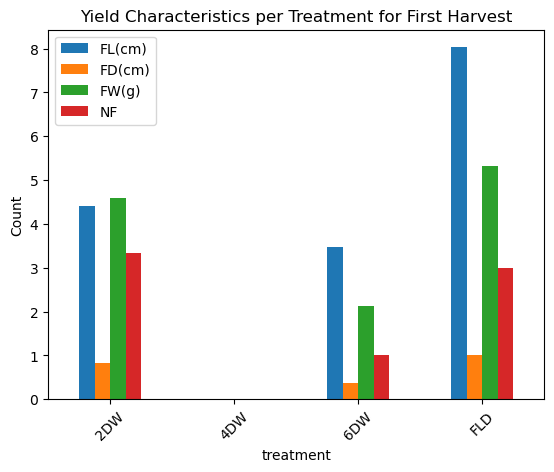

In [15]:
# Create bar chart
avg_h1.plot(kind="bar")
plt.title("Yield Characteristics per Treatment for First Harvest")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("treatment")

# set the x_axis category labels
plt.legend(["FL(cm)", "FD(cm)", "FW(g)", "NF"])

Key:
* FD- fruit diameter
* FL- fruit lenght
* FW- fruit weight
* NF- number of fruits
* TRT- treatments
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days
* WAT- weeks after transplant

Treatment `FLD` produced the highest `FL` and `FW` and followed by `2DW`. It can be observed that `4DW` did not produce any fruit during the first harvest.

# Second Harvest 

In [16]:
# filter and create a dataframe for second harvest

h2_columns = [col for col in df.columns if col.endswith("2H")]
h2_df =df[["TRT"] + h2_columns]
h2_df.head()

,TRT,FL2H,FD2H,FW2H,NF2H
0,FLD,7.5,0.8,1.90,51
1,2DW,6.7,1.2,3.80,4
2,4DW,0.0,0.0,0.00,0
3,6DW,0.0,0.0,0.00,0
4,2DW,3.4,1.7,1.97,20


In [17]:
h2_df.shape

(12, 5)

In [18]:
h2_df.describe()

,FL2H,FD2H,FW2H,NF2H
count,12.00000,12.000000,12.000000,12.000000
mean,5.37750,0.795833,2.775000,9.416667
std,4.88073,0.665534,3.407757,14.822945
min,0.00000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000
50%,6.10000,0.825000,1.915000,4.500000
75%,7.78250,1.275000,3.582500,10.000000
max,14.80000,1.700000,11.260000,51.000000


In [19]:
# Calculate the average yield quality for second harvest 

avg_h2 = h2_df.groupby("TRT").mean().round(2)
avg_h2

,FL2H,FD2H,FW2H,NF2H
TRT,,,,
2DW,7.13,1.47,4.34,9.67
4DW,1.83,0.33,0.56,2.33
6DW,2.88,0.28,1.17,0.67
FLD,9.67,1.10,5.03,25.00


In [20]:
# Perform stats test for all treatment per yield characteristics in 2H 

h2_result = stats.f_oneway(h2_df[h2_df["TRT"]=="FLD"][h2_columns],
                              h2_df[h2_df["TRT"]=="2DW"][h2_columns],
                              h2_df[h2_df["TRT"]=="4DW"][h2_columns],
                              h2_df[h2_df["TRT"]=="6DW"][h2_columns])

# Print the p-value
print("p-value:", h2_result.pvalue)

p-value: [0.15586496 0.03966857 0.29838603 0.15850894]


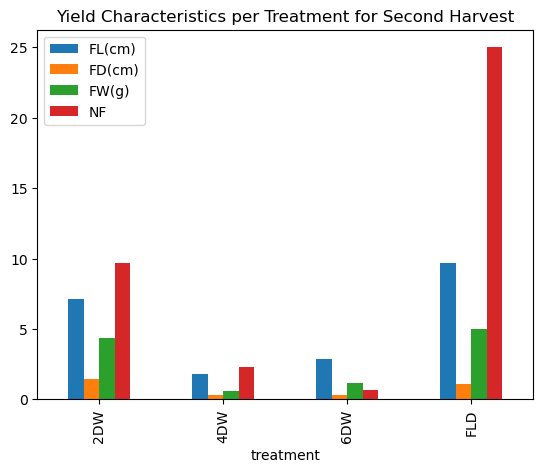

In [21]:
# creat a bar chart

avg_h2.plot(kind="bar")
plt.title("Yield Characteristics per Treatment for Second Harvest")
plt.xlabel("treatment")
plt.legend(["FL(cm)", "FD(cm)", "FW(g)", "NF"])

Keys:
* FD- fruit diameter
* FL- fruit lenght
* FW- fruit weight
* NF- number of fruits
* TRT- treatments
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days
* WAT- weeks after transplant

The highest `NF` and `FL` were from `FLD` while other yield characteristics were closely followed by `2DW`. `4DW` and `6DW`were least performing treatments with regard to yield characteristics

## Third Harvest

In [22]:
# filter and create a dataframe for third harvest

h3_columns = [col for col in df.columns if col.endswith("3H")]
h3_df =df[["TRT"] + h3_columns]
h3_df.head()

,TRT,FL3H,FD3H,FW3H,NF3H
0,FLD,6.6,0.5,1.55,23
1,2DW,4.7,0.6,1.93,6
2,4DW,3.8,0.7,1.55,7
3,6DW,0.0,0.0,0.00,0
4,2DW,2.9,1.3,1.53,15


In [23]:
h3_df.shape

(12, 5)

In [24]:
h3_df.describe()

,FL3H,FD3H,FW3H,NF3H
count,12.000000,12.000000,12.000000,12.000000
mean,4.191667,0.683333,1.792500,8.416667
std,2.463722,0.408619,1.636132,7.012435
min,0.000000,0.000000,0.000000,0.000000
25%,3.575000,0.500000,1.105000,3.750000
50%,4.400000,0.700000,1.550000,6.500000
75%,5.125000,1.025000,1.667500,12.000000
max,8.600000,1.300000,5.730000,23.000000


In [25]:
# Calculate the average yield quality for third harvest

avg_h3 = h3_df.groupby("TRT").mean().round(2)
avg_h3

,FL3H,FD3H,FW3H,NF3H
TRT,,,,
2DW,5.40,1.00,2.54,9.00
4DW,4.90,0.80,1.56,9.00
6DW,1.33,0.23,0.42,3.00
FLD,5.13,0.70,2.65,12.67


In [26]:
# Perform stats test for all treatment per yield characteristics in 3H 

h3_result = stats.f_oneway(h3_df[h3_df["TRT"]=="FLD"][h3_columns],
                              h3_df[h3_df["TRT"]=="2DW"][h3_columns],
                              h3_df[h3_df["TRT"]=="4DW"][h3_columns],
                              h3_df[h3_df["TRT"]=="6DW"][h3_columns])

# Print the p-value
print("p-value:", h3_result.pvalue)

p-value: [0.12321554 0.1045157  0.33442748 0.45314604]


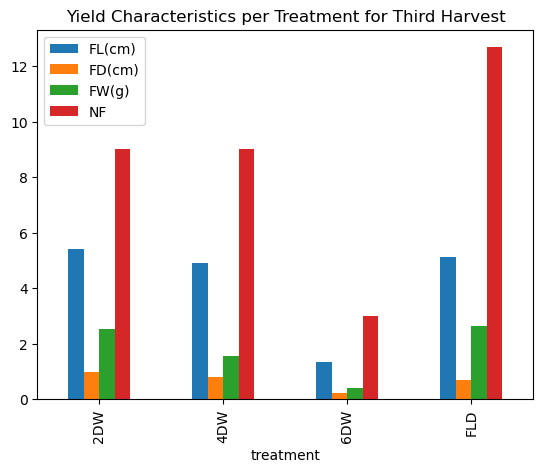

In [27]:
# creat a bar chart
avg_h3.plot(kind="bar")
plt.title("Yield Characteristics per Treatment for Third Harvest")
plt.xlabel("treatment")
plt.legend(["FL(cm)", "FD(cm)", "FW(g)", "NF"])

Keys:
* FD- fruit diameter
* FL- fruit lenght
* FW- fruit weight
* NF- number of fruits
* TRT- treatments
* FLD- flooding (wetting everyday)
* 2DW- wetting every 2days
* 4DW- wetting every 4days
* 6DW- wetting every 6days
* WAT- weeks after transplant

### Looking at the similarities between each treatment

In [28]:
# transpose the avg yield of all treatments from all harvests

trans = avg_yield.T

In [29]:
corr = trans.corr()
corr.style.background_gradient(cmap='coolwarm')

TRT,2DW,4DW,6DW,FLD
TRT,,,,
2DW,1.000000,0.637475,0.552875,0.897614
4DW,0.637475,1.000000,0.343963,0.405064
6DW,0.552875,0.343963,1.000000,0.312025
FLD,0.897614,0.405064,0.312025,1.000000


- The correlation table above simply tells us that there is a close similarity between `FLD` and `2DW` with regard to yield characteristics.

Summary
-----
Generally, `FLD` out performed all other treatments especially in terms of number of fruits. As a farmer this factor is very important as more fruits lead to increased productivity and profitability. Also, treatment `FLD` was closely followed by `2DW` while `4DW` and `6DW` performed poorly in terms of yield characteristics